|クラス分類のための線形モデル|
|:-|

線形モデルはクラス分類にも多用されている。まず、２クラス分類を見てみよう。この場合は、次の式で予測を行う。$$\hat{y}=w[0] \times x[0] + w[1] \times x[1]+ \cdots + w[p] \times x[p] + b > 0$$

この式は、線形回帰のバイトよく似ているが、特徴量の重み付き和を単に返すのではなく、予測された値が0を請えるかどうかで分割している。この関数の値が0より小さければ、クラスは-1になる。0より大きければ、クラスは+1になる。この予測のルールはすべての線形モデルによるクラス分類に共通している。ここでも、係数（$w$）と切片（$b$）を求めるには様々な方法がある。

線形モデルによるクラス分類では、**決定境界**が入力の線形関数になる。言い換えると線形の２クラス分類器は、２つのクラスを直線や平面や超平面で分割するということだ。本節でこの例を示す。


線形モデルを学習するにはさまざまなアルゴリズムがある。これらのアルゴリズムは以下の２点で区別される。
- 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
- 正規化を行うか。行うならどの方法を使うか。

「訓練データへの適合度」を測る尺度は、アルゴリズムによって異なる。linear_model.LogisticRegressionに実装されている**ロジスティック回帰**はと、svm.LineatSVCに実装されている**線形サポートベクターマシン**は、最も一般的な線形クラス分類アルゴリズムだ。LogisticRegressionモデルとLinearSVCモデルをforgeデータセットに適用して、決定境界を可視化してみよう。（**図2-15**）

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

from sklearn.model_selection import train_test_split

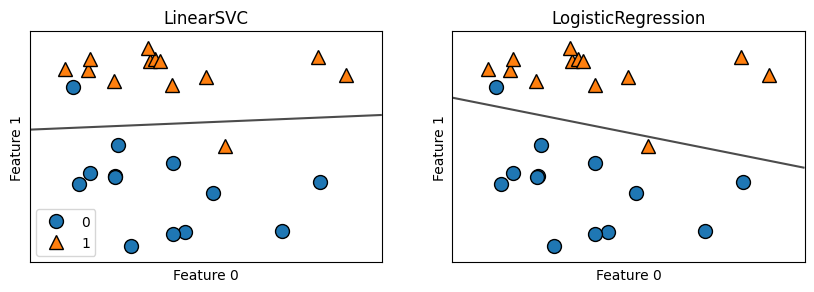

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

この図は、以前と同じようにforgeデータセットの第1特徴量を$x$軸に、第2特徴量をy軸にとり、LinearSVCとLogisticRegressionで見つけた決定境界を直線で表示している。直線の下がクラス0、上がクラス1になる。つまり、黒い線よりも上にあるデータポイントはクラス分類器によってクラス1に分類され、下にあるデータポイントはクラス0に分類される。２つのモデルによる決定境界はよく似ている。両方のモデルはともに、２つのポイントを他方のクラスに分類している。デフォルトではこれらのモデルは、Ridgeが回帰で行ったのと同様に、L2正則化を行う。

LinearSVCとLogisticRegressionにおける正則化の強度を決定するトレードオフパラメータはＣと呼ばれ、Ｃが大きくなると正則化は**弱く**なる。つまり、パラメータＣを大きくすると、LinearSVCとLogisticRegressionは訓練データに対しての適合度を挙げようとするが、パラメータＣを小さくすると係数ベクトル（$w$）を0に近づけることを重視するようになる。

Ｃの影響にはもう一つ面白い側面がある。小さいＣを用いると、データポイントの「大多数」に対して適合しようとするが、大きいＣを用いると、個々のデータポイントを正確にクラス分類することを重視するようになる。LinearSVCの場合の様子を見てみよう。（**図2-16**）

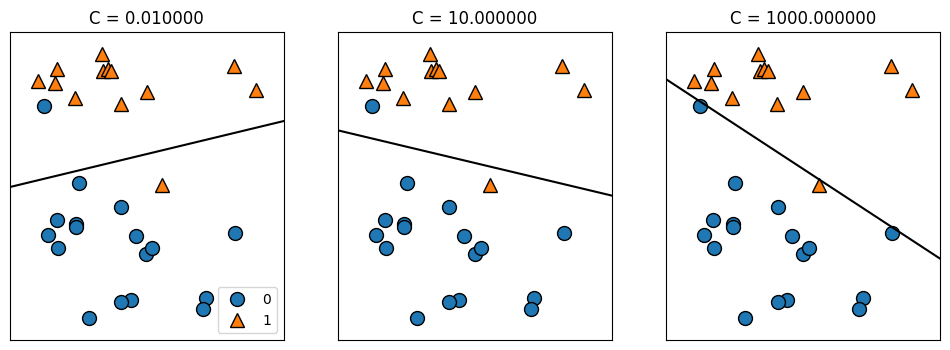

In [21]:
mglearn.plots.plot_linear_svc_regularization()

**図2-16 forgeデータセットを用いた場合の異なるＣに対する決定境界**

左のプロットは小さいCを用いていて強力な正則化を行う場合に対応する。クラス0のほとんどの点が線の下に、クラス1のほとんどの点が線の上に来ている。この強力に正則化が効いたモデルは水平に近く、２つの点のクラス分類に失敗している。Cが少し大きい場合に対応する真ん中のグラフでは、モデルは２点の分類に失敗したサンプルに着目するので、決定境界が傾いている。最後に、Cがとても大きい場合に対応する右のグラフでは、決定境界の傾きはさらに急になり、クラス0のすべての点を正しくクラス分類するようになる。クラス1の点の１つはまだ失敗しているが、これは、このデータセットを直線で分類する場合には、すべての点を正しく分類することは不可能だからだ。この右側のモデルはすべての点を正しくクラス分類することに注力するあまり、クラス全体としてのレイアウトを捉えきれていない。つまり、このモデルはおそらく過剰適合している。

回帰の場合と同様に、線形モデルによるクラス分類は、低次元空間においては制約が強すぎるように思えるかもしれない。決定平面が直線や平面にしかならないからだ。しかし、高次元の場合には線形モデルによるクラス分類は非常に強力になるので、特徴量の数が多い場合には過剰適合を回避する方法が重要になってくる。

LogisticsRegressionをcancerデータセットを用いてより詳しく解析してみよう。

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


↑このメッセージは、ロジスティック回帰モデルの訓練中に収束しなかったことを示しています。具体的には、lbfgsソルバーが最大反復回数に達したため、最適化が完了しなかったことを意味します。これにより、モデルのパフォーマンスが最適でない可能性があります。

デフォルトのC=1は、訓練セットとテストセットの双方で95%と、とても良い性能を示している。しかし、訓練セットとテストセットの精度がとても近いということは、適合不足の可能性が貴い。Cを増やしてより柔軟なモデルにしよう。

In [23]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.965


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=100にすると、訓練セット精度が向上し、テストセット精度もわずかに向上する。複雑なモデルのほうが性能が高いはずだという直感は裏付けられた。

さらに強力に正則化したモデルを試してみよう。デフォルトのC=1をC=0.01にしてみる。

In [24]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


予想通り、すでに適合不足だったモデルから図2-1のさらに左側に寄ってしまい、訓練セット精度もテストセット精度もデフォルトパラメータより悪くなっている。

最後に、３つの正則化パラメータＣに対して学習された係数を見てみよう。

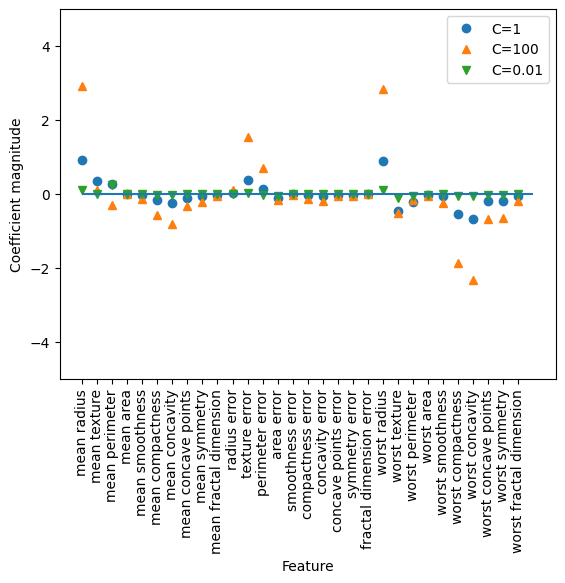

In [25]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()



**図2-17 cancerデータセットを用いて異なるCの値に対してロジスティック回帰で学習した際の係数**

> LogisticRegressionではデフォルトでL2正則化が行われる。結果は図2-12のRidgeによるものと似ている。正則化を強くすると、係数はより0近くへと押し込まれるが、ぴったり0には決してならない。グラフをより詳細に見てみると、３番目の特徴量「mean perimeter」に対する係数が興味深い挙動を示しているのがわかる。C=100とC=1に対して係数は負だが、C=0.001に対しては正になっている。このようなモデルを解釈する際には、どの係数がクラス分類に影響を与えているのかを考察する。例えば、特徴量「texture error」が大きいことと、「悪性（malignant）」都に関係があるのではないか、などと考える。しかし、「mean perimeter」のように、モデルのによって係数の政府が変わってしまうと、どのモデルを見るかによって、「mean perimeter」が大きいことが「良性」を示唆しているのか「悪性」を示唆しているのかが変わってしまう。このことからも、線形モデルの係数の解釈は常に眉につばを付けて聞かないといけないことがわかる。

より解釈しやすいモデルが欲しいのなら、L1正則化を使うといいかもしれない。この正則化はわずかな特徴量しか使わないように制限するからだ。L1正則化を行った時の分類制度をプロットしたものを**図2-18**に示す。

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


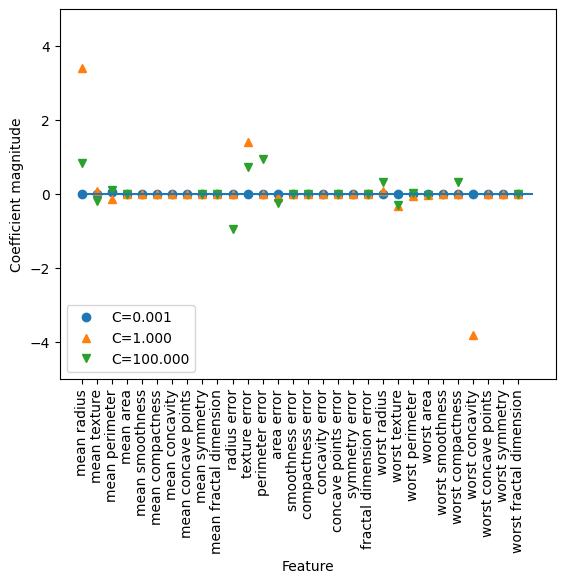

In [26]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


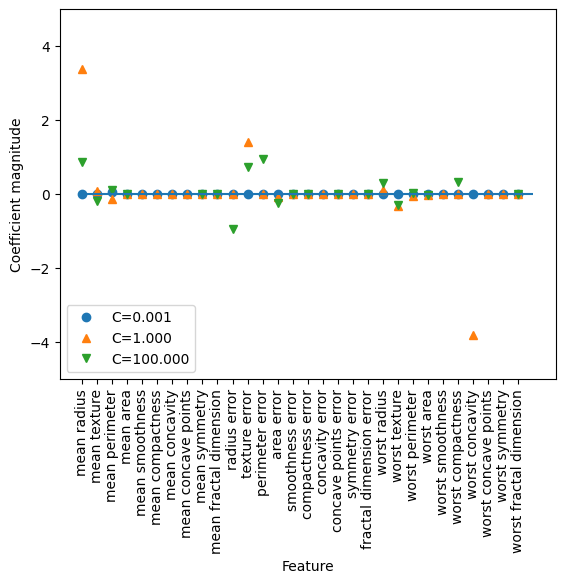

In [27]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# データのロードと分割（前提として既に行われていると仮定）
# X_train, X_test, y_train, y_test, cancer

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

**図2-18 cancerデータセットを用いて異なるCの値に対してL1ペナルティでロジスティック回帰で学習した際の係数**

この図からもわかる通り、２クラス分類のための線形モデル軍と回帰のための線形モデル軍の間には対応関係がある。回帰の時と同じように、モデル間の主な違いはpenaltyパラメータにある。このパラメータがモデルの正則化と、特徴量をすべて使うか一部にしか使わないかに影響を与える。